画图


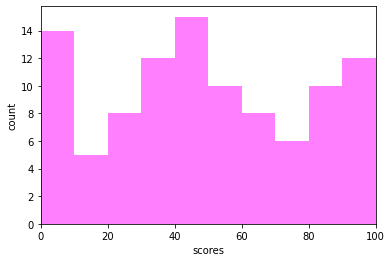

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x=np.random.randint(0,100,100)#生成【0-100】之间的100个数据,即 数据集
bins=np.arange(0,101,10)#设置连续的边界值，即直方图的分布区间[0,10],[10,20]...
#直方图会进行统计各个区间的数值
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明

plt.xlabel('scores')
plt.ylabel('count')
plt.xlim(0,100)#设置x轴分布范围

plt.show()

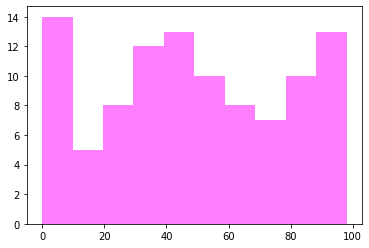

In [5]:
bins=10#设置连续的边界值，即直方图的分布区间[0,10],[10,20]...
#直方图会进行统计各个区间的数值
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明
plt.show()

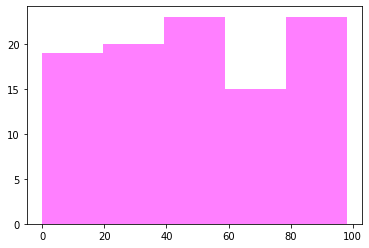

In [6]:
bins=5#设置连续的边界值，即直方图的分布区间[0,10],[10,20]...
#直方图会进行统计各个区间的数值
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明
plt.show()

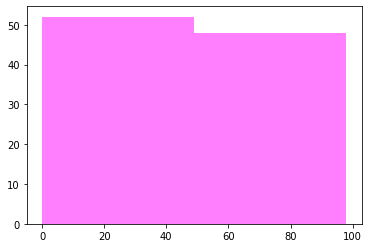

In [9]:
bins=2#bins可以理解为柱子的数量
#直方图会进行统计各个区间的数值
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明
plt.show()

In [ ]:
# 矩阵归一化



In [10]:
from collections import Counter  
a = [1,4,2,3,2,3,4,2]  
 
b = Counter(a) #求数组中每个数字出现了几次
print(b)
 
print(  b[2]) #计算每个元素出现了几次

Counter({2: 3, 4: 2, 3: 2, 1: 1})
3


# tf idf 原理 以及 sklearn 实现


In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

texts=["orange banana apple grape","banana apple apple","grape", 'orange apple']
cv = TfidfVectorizer()
# cv_fit 是一种稀疏矩阵
cv_fit=cv.fit_transform(texts)
print(cv.vocabulary_)

print(cv_fit)
print(cv_fit.toarray())

print(cv.vocabulary_['grape'])
print(cv_fit.toarray()[0][cv.vocabulary_['apple']])


{'orange': 3, 'banana': 1, 'apple': 0, 'grape': 2}
  (0, 2)	0.5230350301866413
  (0, 0)	0.423441934145613
  (0, 1)	0.5230350301866413
  (0, 3)	0.5230350301866413
  (1, 0)	0.8508160982744233
  (1, 1)	0.5254635733493682
  (2, 2)	1.0
  (3, 0)	0.6292275146695526
  (3, 3)	0.7772211620785797
[[0.42344193 0.52303503 0.52303503 0.52303503]
 [0.8508161  0.52546357 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.62922751 0.         0.         0.77722116]]
2
0.423441934145613


In [4]:
# TF-IDF +  RidgeClassifier

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score

train_df = pd.read_csv('../data/train_set.csv', sep='\t', nrows=1500)

tfidf = TfidfVectorizer(ngram_range=(1,4), max_features=3000)

train_test = tfidf.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:1000], train_df['label'].values[:1000])

val_pred = clf.predict(train_test[1000:])
print(f1_score(train_df['label'].values[1000:], val_pred, average='macro'))

0.7747778486008526


In [14]:
all_data_size = 1500
train_data_size = 1000
test_data_size = all_data_size - train_data_size
vector_size = 3000

train_df = pd.read_csv('../data/train_set.csv', sep='\t', nrows=all_data_size)
doc_data = train_df['text']
train_label = train_df['label'].values[:train_data_size]


 # 频率过高的视为标点符号
from collections import Counter

train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d: int(d[1]), reverse=True)
print(len(word_count))
print(word_count[0])
print(word_count[1])


tfidf = TfidfVectorizer(ngram_range=(1, 4), max_features=vector_size)

train_test = tfidf.fit_transform(train_df['text'])
print("词汇表长度",len(tfidf.vocabulary_))
print("稀疏矩阵的形状",train_test.toarray().shape)
print("稀疏矩阵第一行的长度",len(train_test.toarray()[0]))


clf = RidgeClassifier()
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])

val_pred = clf.predict(train_test[train_data_size:])
print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))
    

4220
('900', 1492)
('3750', 1489)
词汇表长度 3000
稀疏矩阵的形状 (1500, 3000)
稀疏矩阵第一行的长度 3000
0.7747778486008526


4220
('900', 1492)
('3750', 1489)
0.511036128654258
0.5364683544185612
0.5782626308161328
0.5412329512903725
0.5318054453595906
0.5281116353480989
0.5196554956825995
0.5359578467647771
0.5155481838160761
0.5098758846920236
0.5079955060020758
0.5007564957836591
0.503506297969346
0.4845706135077848
0.4912749230773646
0.48806599933745326
0.48702261999718577
0.47374979915987436
0.4855308613033457


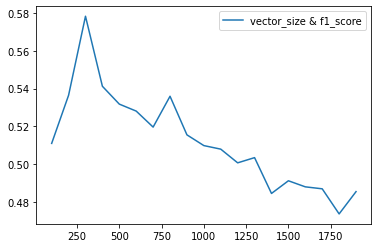

0.5533009792165503
词汇表长度 1900
稀疏矩阵的形状 (1500, 1900)
稀疏矩阵第一行的长度 1900
0.7709652254025181


In [18]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


all_data_size = 1500
train_data_size = 1000
test_data_size = all_data_size - train_data_size
vector_size = 3000

train_df = pd.read_csv('../data/train_set.csv', sep='\t', nrows=all_data_size)
doc_data = train_df['text']
train_label = train_df['label'].values[:train_data_size]


 # 频率过高的视为标点符号
from collections import Counter

train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d: int(d[1]), reverse=True)
print(len(word_count))
print(word_count[0])
print(word_count[1])

########################################################
 # td-idf



tfidf = TfidfVectorizer(ngram_range=(1, 4), max_features=vector_size)

train_test = tfidf.fit_transform(train_df['text'])
print("词汇表长度",len(tfidf.vocabulary_))
print("稀疏矩阵的形状",train_test.toarray().shape)
print("稀疏矩阵第一行的长度",len(train_test.toarray()[0]))


clf = RidgeClassifier()
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])

val_pred = clf.predict(train_test[train_data_size:])
print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))

################################################################

useless = set()
for i in range(0, 4):
    if int(word_count[i][1]) > len(word_count)*2:
        useless.add(word_count[i][0])

common_text = []
for i in range(0, doc_data.size):
    doc = str(doc_data[i]).split(" ")
    common_text.append(doc)

# 词向量的维度，样本够的话300-500。
# min_count 最小次数计数，出现次数低于这个数的就不要了
# workers  线程数
# window 窗口大小
# sample 负例采样设置aa
x = []
y = []
for vector_size in range(100,2000,100):
    # vector_size = 350
    x.append(vector_size)
    model = Word2Vec(sentences=common_text, vector_size=vector_size, window=5, min_count=4,
                      workers=12, sample=1e-5)
    # model.save("word2vec.model")
    vector = model.wv['2967']

    # 词向量 合成 文本向量
    doc_v_list = np.array([])

    for split_doc in common_text:
        used_word = float(0.0)
        vector = model.wv['2967']
        vector = vector * 0
        for word in split_doc:
            # 去掉标点 0.64 - 0.68
            if word in useless: continue

            used_word += 1.0
            try:
                vector += model.wv[word]
            except Exception as e:
                # print(e.__traceback__.tb_frame.f_globals["__file__"])  # 发生异常所在的文件
                # print(e.__traceback__.tb_lineno)  # 发生异常所在的行数
                used_word -= 1.0

        vector /= used_word /200
        
        
      

        doc_v_list = np.append(doc_v_list, vector)

    train_test = doc_v_list.reshape(len(common_text), vector_size)

    # 使用word2vec 使用 词袋
    clf = RidgeClassifier()
    clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])

    val_pred = clf.predict(train_test[train_data_size:])
    print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))
    y.append(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))





plt.plot(x, y, label='vector_size & f1_score')
plt.legend(loc='upper right')
plt.show()

# 不使用word2vec 使用 词袋
vectorizer = CountVectorizer(max_features=3000)
train_test = vectorizer.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])

val_pred = clf.predict(train_test[train_data_size:])
print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))









############################################################










    

# 1 读取数据

In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


all_data_size = 1500
train_data_size = 1000
test_data_size = all_data_size - train_data_size
vector_size = 3000

train_df = pd.read_csv('../data/train_set.csv', sep='\t', nrows=all_data_size)
doc_data = train_df['text']
train_label = train_df['label'].values[:train_data_size]


 # 频率过高的视为标点符号
from collections import Counter

train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d: int(d[1]), reverse=True)
print(len(word_count))
print(word_count[0])
print(word_count[1])

4220
('900', 1492)
('3750', 1489)


# 2 构建 tf-idf

In [3]:
 # td-idf

tfidf = TfidfVectorizer(ngram_range=(1, 4), max_features=vector_size)

train_test = tfidf.fit_transform(train_df['text'])
print("词汇表长度",len(tfidf.vocabulary_))
print("稀疏矩阵的形状",train_test.toarray().shape)
print("稀疏矩阵第一行的长度",len(train_test.toarray()[0]))

词汇表长度 3000
稀疏矩阵的形状 (1500, 3000)
稀疏矩阵第一行的长度 3000


# 3 tf-idf 文本分类

In [4]:

clf = RidgeClassifier()
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])

val_pred = clf.predict(train_test[train_data_size:])
print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))

0.7747778486008526


# 4 word2vec 文本向量化算法


In [6]:

useless = set()
for i in range(0, 4):
    if int(word_count[i][1]) > len(word_count)*2:
        useless.add(word_count[i][0])

common_text = []
for i in range(0, doc_data.size):
    doc = str(doc_data[i]).split(" ")
    common_text.append(doc)

# 词向量的维度，样本够的话300-500。
# min_count 最小次数计数，出现次数低于这个数的就不要了
# workers  线程数
# window 窗口大小
# sample 负例采样设置aa


vector_size = 500
model = Word2Vec(sentences=common_text, vector_size=vector_size, window=5, min_count=4,
                  workers=12, sample=1e-5)
# model.save("word2vec.model")
vector = model.wv['2967']

# 词向量 合成 文本向量
doc_v_list = np.array([])

for split_doc in common_text:
    used_word = float(0.0)
    vector = model.wv['2967']
    vector = vector * 0
    for word in split_doc:
        
        if word in useless: continue

        used_word += 1.0
        try:
            vector += model.wv[word]
        except Exception as e:
            # print(e.__traceback__.tb_frame.f_globals["__file__"])  # 发生异常所在的文件
            # print(e.__traceback__.tb_lineno)  # 发生异常所在的行数
            used_word -= 1.0

    vector /= used_word /200
    doc_v_list = np.append(doc_v_list, vector)

train_test = doc_v_list.reshape(len(common_text), vector_size)

# 使用word2vec 
clf = RidgeClassifier()
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])

val_pred = clf.predict(train_test[train_data_size:])
print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))





0.5502370322600852


# 4 word2vec + tf-IDF文本向量化算法

In [7]:

#tfidf = TfidfVectorizer(ngram_range=(1, 4), max_features=vector_size)

train_test = tfidf.fit_transform(train_df['text'])
print("词汇表长度",len(tfidf.vocabulary_))
print("稀疏矩阵的形状",train_test.toarray().shape)
print("稀疏矩阵第一行的长度",len(train_test.toarray()[0]))

index_word = {}
for k in tfidf.vocabulary_:
    index_word[tfidf.vocabulary_[k]] = k
    
print(len(train_test.toarray()))

print(len(common_text) == len(train_test.toarray()) )
vector_size
print(vector_size == len( train_test.toarray()[0] ) ) 


dn = np.array([])
print(len(model.wv[index_word[0]]))
print(type(model.wv[index_word[0]]) == type(dn))
for word_weights in train_test.toarray():
    word_weights_vec = 0 * model.wv[index_word[0]] 
    for j in range(0, len(train_test.toarray()[0])):
        if word_weights[j] > 0.01:
            try:
                word_weights_vec +=  (word_weights[j]*100) * model.wv[index_word[j]]
            except Exception as e:
                continue

    dn = np.append(dn, word_weights_vec)
train_test = dn.reshape(len(common_text), vector_size)         
# print(len(dn))

词汇表长度 3000
稀疏矩阵的形状 (1500, 3000)
稀疏矩阵第一行的长度 3000
1500
True
False
500
True


In [8]:

clf = RidgeClassifier()
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])

val_pred = clf.predict(train_test[train_data_size:])
print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))

0.7169206484139127


In [ ]:
# Count Vectors + RidgeClassifier

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score


clf = RidgeClassifier()
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])
val_pred = clf.predict(train_test[train_data_size:])

print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))
# 0.28

# svm
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=30, gamma=0.5, decision_function_shape='ovo')
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])
val_pred = clf.predict(train_test[train_data_size:])

print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))


from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 13 , weights='distance')
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])
val_pred = clf.predict(train_test[train_data_size:])

print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))

0.7169206484139127


In [99]:
def normalization(data):
#     for i in range(0, len(data)):
#         data[i] = data[i]/np.normal(data[i])
    y=np.linalg.norm(data, axis=1, keepdims=True)
    z=data/y
    return z

a = np.array([1.0,2.0,3.0,4.0])
A = a.reshape(2, 2)
A = normalization(A)
A

array([[0.4472136 , 0.89442719],
       [0.6       , 0.8       ]])

In [92]:
 # td-idf

tfidf = TfidfVectorizer(ngram_range=(1, 4), max_features=vector_size)

train_test = tfidf.fit_transform(train_df['text'])
print("词汇表长度",len(tfidf.vocabulary_))
print("稀疏矩阵的形状",train_test.toarray().shape)
print("稀疏矩阵第一行的长度",len(train_test.toarray()[0]))

# train_test = normalization(train_test)

clf = RidgeClassifier()
clf.fit(train_test[:train_data_size], train_df['label'].values[:train_data_size])

val_pred = clf.predict(train_test[train_data_size:])
print(f1_score(train_df['label'].values[train_data_size:], val_pred, average='macro'))

词汇表长度 500
稀疏矩阵的形状 (1500, 500)
稀疏矩阵第一行的长度 500


SystemError: <built-in function isinstance> returned a result with an error set